In [ ]:
def heart_rate_feature_extraction(data, sampling_rate = 500):

    plt.style.use('bmh')

    cleaned = nk.ecg_clean(data, sampling_rate=sampling_rate, method="pantompkins1985") # cleaning ECG 
    pantompkins1985 = nk.ecg_findpeaks(cleaned, method="pantompkins1985") # find the R peaks
    hrv_df = pd.DataFrame(pantompkins1985)

    hrv_df["RR Intervals"] = hrv_df["ECG_R_Peaks"].diff()
    hrv_df.loc[0, "RR Intervals"]=hrv_df.loc[0]['ECG_R_Peaks'] # the first datapoint contain Nan we manually fix it

    # hrvana.plot_timeseries(hrv_df["RR Intervals"].values.tolist()) # visualise 90 RR intervals

    clean_rri = hrv_df['RR Intervals'].values/sampling_rate*1000 # Convert sample to ms
    clean_rri = hrvana.remove_outliers(rr_intervals=clean_rri, low_rri=300, high_rri=2000)
    clean_rri = hrvana.interpolate_nan_values(rr_intervals=clean_rri, interpolation_method="linear")
    clean_rri = hrvana.remove_ectopic_beats(rr_intervals=clean_rri, method="malik")
    clean_rri = hrvana.interpolate_nan_values(rr_intervals=clean_rri, interpolation_method="linear")

    # hrvana.plot_timeseries(clean_rri) # due to the size of the dataset, here we only show the 90 nnis
    # plt.title("NN intervals")
    # plt.title("NN Interval Over Time")
    # plt.ylabel("ms")
    # plt.xlabel("NN Interval Index")

    hrv_df["RR Intervals"] = clean_rri 
    hrv_df["RR Intervals"].isna().any()

    nn_epoch = hrv_df['RR Intervals'].values

    
    feature_list = []
    all_hr_features = {}
    all_hr_features.update(hrvana.get_time_domain_features(nn_epoch))
    all_hr_features.update(hrvana.get_frequency_domain_features(nn_epoch))
    all_hr_features.update(hrvana.get_poincare_plot_features(nn_epoch))
    all_hr_features.update(hrvana.get_csi_cvi_features(nn_epoch))
    all_hr_features.update(hrvana.get_geometrical_features(nn_epoch))
    feature_list.append(all_hr_features)
    hrv_feature_df = pd.DataFrame(feature_list)
    hrv_feature_df.isna().any()
    
    return hrv_feature_df  #Return cleaned updated rri_interval in ms.

In [ ]:
import pandas as pd
def return_hrv_participant_wise(data: pd.DataFrame(), sampling_rate = 500):

    hrv = pd.DataFrame()

    # for each_column in data.columns:
    list_of_leads = ['II', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
    for each_column in list_of_leads:
      
        try:
            df1 = heart_rate_feature_extraction(np.array(data[each_column]), sampling_rate = sampling_rate)
            # df1 =norm_api.Ecg_analysis().Neurokit2().heart_rate_feature_extraction(np.array(data[each_column]), sampling_rate = sampling_rate)
            

            df1.columns = each_column + "_"  + df1.columns
            hrv = pd.concat([hrv, df1], axis = 1)

            hrv.reset_index(inplace = True, drop =True)
            
        except:
            continue

    return hrv

In [ ]:
!pip install neurokit2
!pip install hrv-analysis
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=237783 sha256=91c44dff47af9895ad7e986d093da921890dc4306845d07c9f2cc73b505c1a04
  Stored in directory: /root/.cache/pip/wheels/e7/5a/0

In [ ]:
import pandas as pd
import neurokit2 as nk  # This package can process ECG
import hrvanalysis as hrvana # RR interval processing package
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
import hrvanalysis as hrvana # RR interval processing package
import numpy as np
import neurokit2 as nk  # This package can process ECG
import pyhrv.tools as tools
from pyhrv.hrv import hrv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RM_1001 = pd.read_excel("/content/drive/MyDrive/ecg_dataset/Visit 1/Group 1/1001 Rm/1001_Rm.xls")
RM_1001 = RM_1001.drop([0, 5007]) ## dropping nan values
RM_1001

,I,II,III,avR,avL,avF,V1,V2,V3,V4,V5,V6
1,2.0,14.0,12.0,-7.0,-5.0,13.0,-160.0,-174.0,-85.0,-85.0,-2.0,-18.0
2,-6.0,1.0,7.0,4.0,-5.0,5.0,-145.0,-156.0,-79.0,-80.0,-5.0,-17.0
3,-9.0,-9.0,0.0,12.0,-4.0,-5.0,-140.0,-150.0,-80.0,-80.0,-9.0,-20.0
4,-9.0,-19.0,-9.0,15.0,1.0,-13.0,-144.0,-153.0,-86.0,-84.0,-15.0,-23.0
5,-8.0,-23.0,-14.0,18.0,4.0,-18.0,-150.0,-159.0,-90.0,-88.0,-17.0,-23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5002,47.0,144.0,98.0,-96.0,-26.0,122.0,78.0,209.0,245.0,171.0,169.0,146.0
5003,70.0,206.0,137.0,-138.0,-34.0,171.0,101.0,310.0,369.0,267.0,264.0,228.0
5004,104.0,280.0,178.0,-192.0,-37.0,229.0,119.0,421.0,519.0,392.0,387.0,330.0
5005,149.0,365.0,218.0,-258.0,-35.0,292.0,108.0,513.0,682.0,548.0,538.0,460.0


In [ ]:
!pip install pywavelets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pywt
from sklearn.cluster import KMeans

def DWPT(ecg_data):
    coeffs = pywt.dwt(ecg_data, 'db1', level=4)
    return coeffs

def cluster_ecg_data(ecg_data):
    coeffs = DWPT(ecg_data)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(coeffs)
    return kmeans.labels_

# Example usage
ecg_data = np.random.rand(1000)
labels = cluster_ecg_data(ecg_data)
print(labels)


TypeError: ignored

In [ ]:
df = return_hrv_participant_wise(RM_1001)
df.shape

0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
0 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
2 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.
0 outlier(s) have been deleted.
1 ectopic beat(s) have been deleted with malik rule.


(1, 217)

In [ ]:
df

,II_mean_nni,II_sdnn,II_sdsd,II_nni_50,II_pnni_50,II_nni_20,II_pnni_20,II_rmssd,II_median_nni,II_range_nni,...,V6_total_power,V6_vlf,V6_sd1,V6_sd2,V6_ratio_sd2_sd1,V6_csi,V6_cvi,V6_Modified_csi,V6_triangular_index,V6_tinn
0,799.083333,136.617221,114.167993,8,72.727273,8,72.727273,120.268639,752.0,482.0,...,2863.660708,899.058366,66.187612,178.448499,2.696101,2.696101,5.27641,1924.460825,4.0,None


In [ ]:
df['II_tinn']

0    None
Name: II_tinn, dtype: object

In [ ]:
df.dropna(axis=1, how = 'all', inplace=True) # drop columns with all missing values
df.dropna(axis=0, how = 'any', inplace=True) # drop rows with any missing values

In [ ]:
df.shape

(1, 217)

In [ ]:
df

,II_mean_nni,II_sdnn,II_sdsd,II_nni_50,II_pnni_50,II_nni_20,II_pnni_20,II_rmssd,II_median_nni,II_range_nni,...,V6_total_power,V6_vlf,V6_sd1,V6_sd2,V6_ratio_sd2_sd1,V6_csi,V6_cvi,V6_Modified_csi,V6_triangular_index,V6_tinn
0,799.083333,136.617221,114.167993,8,72.727273,8,72.727273,120.268639,752.0,482.0,...,2863.660708,899.058366,66.187612,178.448499,2.696101,2.696101,5.27641,1924.460825,4.0,None


In [ ]:
col_names = df.columns.to_list()
## 30 hrv features per lead extracted
col_names

['II_mean_nni',
 'II_sdnn',
 'II_sdsd',
 'II_nni_50',
 'II_pnni_50',
 'II_nni_20',
 'II_pnni_20',
 'II_rmssd',
 'II_median_nni',
 'II_range_nni',
 'II_cvsd',
 'II_cvnni',
 'II_mean_hr',
 'II_max_hr',
 'II_min_hr',
 'II_std_hr',
 'II_lf',
 'II_hf',
 'II_lf_hf_ratio',
 'II_lfnu',
 'II_hfnu',
 'II_total_power',
 'II_vlf',
 'II_sd1',
 'II_sd2',
 'II_ratio_sd2_sd1',
 'II_csi',
 'II_cvi',
 'II_Modified_csi',
 'II_triangular_index',
 'V1_mean_nni',
 'V1_sdnn',
 'V1_sdsd',
 'V1_nni_50',
 'V1_pnni_50',
 'V1_nni_20',
 'V1_pnni_20',
 'V1_rmssd',
 'V1_median_nni',
 'V1_range_nni',
 'V1_cvsd',
 'V1_cvnni',
 'V1_mean_hr',
 'V1_max_hr',
 'V1_min_hr',
 'V1_std_hr',
 'V1_lf',
 'V1_hf',
 'V1_lf_hf_ratio',
 'V1_lfnu',
 'V1_hfnu',
 'V1_total_power',
 'V1_vlf',
 'V1_sd1',
 'V1_sd2',
 'V1_ratio_sd2_sd1',
 'V1_csi',
 'V1_cvi',
 'V1_Modified_csi',
 'V1_triangular_index',
 'V2_mean_nni',
 'V2_sdnn',
 'V2_sdsd',
 'V2_nni_50',
 'V2_pnni_50',
 'V2_nni_20',
 'V2_pnni_20',
 'V2_rmssd',
 'V2_median_nni',
 'V2_range_

Making complete dataset


In [ ]:
class df_holder:
    def __init__(self, df): 
        self.df = df

In [ ]:
df__ = pd.read_pickle("/content/drive/MyDrive/class_dataset.pkl")
df__.loc[1001,'V1_df'].df

,I,II,III,avR,avL,avF,V1,V2,V3,V4,V5,V6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,14.0,12.0,-7.0,-5.0,13.0,-160.0,-174.0,-85.0,-85.0,-2.0,-18.0
2,-6.0,1.0,7.0,4.0,-5.0,5.0,-145.0,-156.0,-79.0,-80.0,-5.0,-17.0
3,-9.0,-9.0,0.0,12.0,-4.0,-5.0,-140.0,-150.0,-80.0,-80.0,-9.0,-20.0
4,-9.0,-19.0,-9.0,15.0,1.0,-13.0,-144.0,-153.0,-86.0,-84.0,-15.0,-23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5003,70.0,206.0,137.0,-138.0,-34.0,171.0,101.0,310.0,369.0,267.0,264.0,228.0
5004,104.0,280.0,178.0,-192.0,-37.0,229.0,119.0,421.0,519.0,392.0,387.0,330.0
5005,149.0,365.0,218.0,-258.0,-35.0,292.0,108.0,513.0,682.0,548.0,538.0,460.0
5006,204.0,461.0,258.0,-332.0,-27.0,359.0,81.0,596.0,856.0,729.0,713.0,610.0


In [ ]:
_lr,_lc = 3,4
_leads = [
    [['I'],['avR'],['V1'],['V4']],
    [['II'],['avL'],['V2'],['V5']],
    [['III'],['avF'],['V3'],['V6']]
]

df__1001 = df__.loc[1001,'V1_df'].df


fig,ax = plt.subplots(_lr,_lc, figsize=(_lr*7,_lc*4))
#fig.set_dpi(150)
for i in range(0,3):
    for j in range(0,4):
        _key = _leads[i][j][0]
        ax[i,j].set_title(_key)
        ax[i,j].plot(df__1001[_key], color='black', linewidth=0.6)
        ax[i,j].set_ylim((-1500,1500))
        ax[i,j].set_xlim((0,5000))
        ax[i,j].hlines(0,0,5000,color='black',linestyle='dotted')


plt.show()

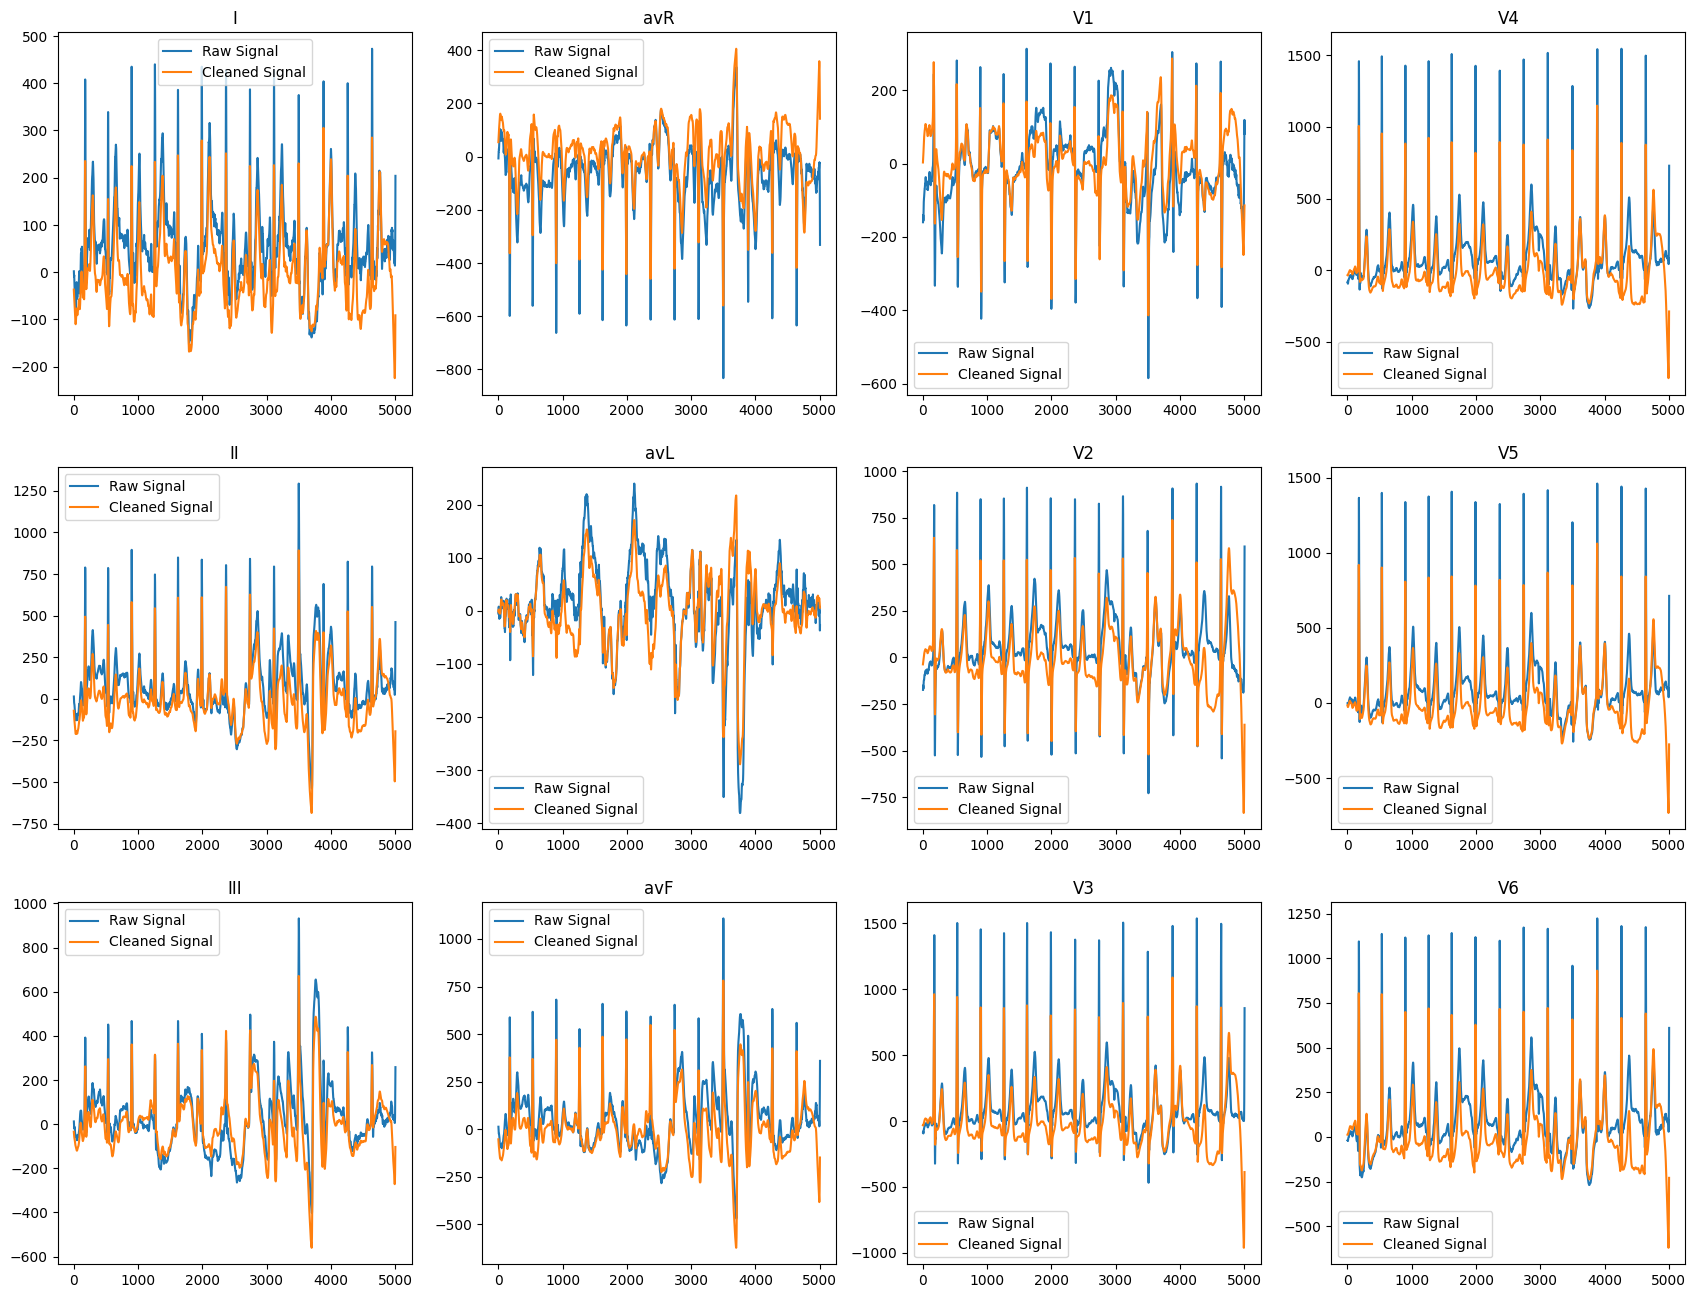

In [ ]:
from scipy import signal

df = df__.loc[1001,'V1_df'].df

fig,ax = plt.subplots(_lr,_lc, figsize=(_lr*7,_lc*4))
for i in range(0,3):
    for j in range(0,4):
        _key = _leads[i][j][0]
        ax[i,j].set_title(_key)
        sos = signal.butter(5, 0.3, 'hp', fs=2000, output='sos')
        sig = df[_key]
        sig = sig.drop([0, 5007])
        clean_sig = nk.ecg_clean(sig, 500)
        filtd=signal.sosfilt(sos, sig)
        ax[i,j].plot(sig, label='Raw Signal')
        ax[i,j].plot(clean_sig, label='Cleaned Signal')
        ax[i,j].legend(['Raw Signal', 'Cleaned Signal'])

plt.show()

In [ ]:
dfs = ['V1_df', 'V2_df', 'V3_df']
hrv_dataset = df__
for ind in df__.index:
    for df_visit in dfs:
        ndf = df__.loc[ind, df_visit].df
        ndf = ndf.drop([0, 5007])
        ndf_hrv = return_hrv_participant_wise(ndf)
        hrv_dataset.loc[ind, df_visit+'HRV'] = df_holder(ndf_hrv)



    # ndf_hrv.dropna(axis=1, how = 'all', inplace=True) # drop columns with all missing values
    # ndf_hrv.dropna(axis=0, how = 'any', inplace=True) # drop rows with any missing values


In [ ]:
hrv_dataset

,V1,V2,V3,Group,V1_path,V2_path,V3_path,V1_df,V2_df,V3_df,V1_dfHRV,V2_dfHRV,V3_dfHRV
ID,,,,,,,,,,,,,
1001,0,0,0,1,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80dba45550>,<__main__.df_holder object at 0x7f80db8e42e0>,<__main__.df_holder object at 0x7f80db7ae700>,<__main__.df_holder object at 0x7f80dbc8f1f0>,<__main__.df_holder object at 0x7f80dbc8f220>,<__main__.df_holder object at 0x7f80dba57760>
1003,0,1,0,1,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80dba4e160>,<__main__.df_holder object at 0x7f80db8e4580>,<__main__.df_holder object at 0x7f80db7ae9a0>,<__main__.df_holder object at 0x7f80dbc9c700>,<__main__.df_holder object at 0x7f80e2691a60>,<__main__.df_holder object at 0x7f80dbc9c430>
1005,0,0,0,1,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80db9551c0>,<__main__.df_holder object at 0x7f80db8e47f0>,<__main__.df_holder object at 0x7f80db7aec10>,<__main__.df_holder object at 0x7f80dbc8fc70>,<__main__.df_holder object at 0x7f80dbca0880>,<__main__.df_holder object at 0x7f80dbca0310>
1006,0,0,0,1,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80db8f4130>,<__main__.df_holder object at 0x7f80db8e4a60>,<__main__.df_holder object at 0x7f80db7aee80>,<__main__.df_holder object at 0x7f80dbc9c820>,<__main__.df_holder object at 0x7f80db7732e0>,<__main__.df_holder object at 0x7f80dbc9cfd0>
1008,0,0,0,1,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80e25f5bb0>,<__main__.df_holder object at 0x7f80db8e4cd0>,<__main__.df_holder object at 0x7f80db7b6130>,<__main__.df_holder object at 0x7f80dba574c0>,<__main__.df_holder object at 0x7f80e8db4c40>,<__main__.df_holder object at 0x7f80dba57e80>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,0,0,0,2,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80db8e5670>,<__main__.df_holder object at 0x7f80db7a7a90>,<__main__.df_holder object at 0x7f80db6aaf10>,<__main__.df_holder object at 0x7f80db9d3670>,<__main__.df_holder object at 0x7f80db9819a0>,<__main__.df_holder object at 0x7f80db97b250>
1198,0,0,0,2,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80db8e58e0>,<__main__.df_holder object at 0x7f80db7a7d00>,<__main__.df_holder object at 0x7f80db6b31c0>,<__main__.df_holder object at 0x7f80db97bee0>,<__main__.df_holder object at 0x7f80db9c97c0>,<__main__.df_holder object at 0x7f80db9dc5e0>
1199,1,0,0,1,/content/drive/MyDrive/ecg_dataset/Visit 1/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 2/Gro...,/content/drive/MyDrive/ecg_dataset/Visit 3/Gro...,<__main__.df_holder object at 0x7f80db8e5b50>,<__main__.df_holder object at 0x7f80db7a7f70>,<__main__.df_holder object at 0x7f80db6b3430>,<__main__.df_holder object at 0x7f80db9c9b20>,<__main__.df_holder object at 0x7f80db9d3190>,<__main__.df_holder object at 0x7f80db9c1af0>


In [ ]:
hrv_dataset.columns.to_list()

['V1',
 'V2',
 'V3',
 'Group',
 'V1_path',
 'V2_path',
 'V3_path',
 'V1_df',
 'V2_df',
 'V3_df',
 'V1_dfHRV',
 'V2_dfHRV',
 'V3_dfHRV']

In [ ]:
hrv_dataset = hrv_dataset.drop(['V1_path',
 'V2_path',
 'V3_path'], axis = 1)

In [ ]:
hrv_dataset = hrv_dataset.drop(['V1_path',
 'V2_path',
 'V3_path',
 'V1_df',
 'V2_df',
 'V3_df'], axis = 1)

In [ ]:
hrv_dataset.loc[1001, 'V1_df'].df

,I,II,III,avR,avL,avF,V1,V2,V3,V4,V5,V6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,14.0,12.0,-7.0,-5.0,13.0,-160.0,-174.0,-85.0,-85.0,-2.0,-18.0
2,-6.0,1.0,7.0,4.0,-5.0,5.0,-145.0,-156.0,-79.0,-80.0,-5.0,-17.0
3,-9.0,-9.0,0.0,12.0,-4.0,-5.0,-140.0,-150.0,-80.0,-80.0,-9.0,-20.0
4,-9.0,-19.0,-9.0,15.0,1.0,-13.0,-144.0,-153.0,-86.0,-84.0,-15.0,-23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5003,70.0,206.0,137.0,-138.0,-34.0,171.0,101.0,310.0,369.0,267.0,264.0,228.0
5004,104.0,280.0,178.0,-192.0,-37.0,229.0,119.0,421.0,519.0,392.0,387.0,330.0
5005,149.0,365.0,218.0,-258.0,-35.0,292.0,108.0,513.0,682.0,548.0,538.0,460.0
5006,204.0,461.0,258.0,-332.0,-27.0,359.0,81.0,596.0,856.0,729.0,713.0,610.0


In [ ]:
hrv_dataset.loc[1001, 'V1_df'].df.values.tolist()[1]

[2.0, 14.0, 12.0, -7.0, -5.0, 13.0, -160.0, -174.0, -85.0, -85.0, -2.0, -18.0]

In [ ]:
hrv_dataset.rename(columns = {'V1_dfHRV': 'V1_df', 'V2_dfHRV': 'V2_df', 'V3_dfHRV': 'V3_df'}, inplace = True)
hrv_dataset

,V1,V2,V3,Group,V1_df,V2_df,V3_df
ID,,,,,,,
1001,0,0,0,1,<__main__.df_holder object at 0x7ff25466e370>,<__main__.df_holder object at 0x7ff2533c5b80>,<__main__.df_holder object at 0x7ff2533c5af0>
1003,0,1,0,1,<__main__.df_holder object at 0x7ff2533c5d00>,<__main__.df_holder object at 0x7ff2533cbfd0>,<__main__.df_holder object at 0x7ff2533cbd30>
1005,0,0,0,1,<__main__.df_holder object at 0x7ff2547c24c0>,<__main__.df_holder object at 0x7ff2533c5be0>,<__main__.df_holder object at 0x7ff2533c5e20>
1006,0,0,0,1,<__main__.df_holder object at 0x7ff2548aa070>,<__main__.df_holder object at 0x7ff2533d62e0>,<__main__.df_holder object at 0x7ff2533cbd60>
1008,0,0,0,1,<__main__.df_holder object at 0x7ff25968e760>,<__main__.df_holder object at 0x7ff2533d6640>,<__main__.df_holder object at 0x7ff2533cb640>
...,...,...,...,...,...,...,...
1197,0,0,0,2,<__main__.df_holder object at 0x7ff2523e9370>,<__main__.df_holder object at 0x7ff2523e9df0>,<__main__.df_holder object at 0x7ff252392190>
1198,0,0,0,2,<__main__.df_holder object at 0x7ff252356be0>,<__main__.df_holder object at 0x7ff252392fd0>,<__main__.df_holder object at 0x7ff2523560d0>
1199,1,0,0,1,<__main__.df_holder object at 0x7ff2523564f0>,<__main__.df_holder object at 0x7ff2523e9940>,<__main__.df_holder object at 0x7ff2522c87c0>


In [ ]:
lds = {"id":[],"v":[]}
for i in hrv_dataset.loc[1001, "V1_df"].df.columns.tolist():
    lds[i]=[]

for i in hrv_dataset.loc[1001, "V1_dfHRV"].df.columns.tolist():
    lds[i]=[]

n_ds = pd.DataFrame(lds)


for i in hrv_dataset.index:
    row = [i, hrv_dataset.loc[i, "V1"]]
    row.extend(hrv_dataset.loc[i, "V1_df"].df.values.tolist()[0])
    row.extend(hrv_dataset.loc[i, "V1_dfHRV"].df.values.tolist()[0])
    n_ds.loc[len(n_ds)] = row
    row = [i, hrv_dataset.loc[i, "V2"]]
    row.extend(hrv_dataset.loc[i, "V2_df"].df.values.tolist()[0])
    row.extend(hrv_dataset.loc[i, "V2_dfHRV"].df.values.tolist()[0])
    n_ds.loc[len(n_ds)] = row
    row = [i, hrv_dataset.loc[i, "V3"]]
    row.extend(hrv_dataset.loc[i, "V3_df"].df.values.tolist()[0])
    row.extend(hrv_dataset.loc[i, "V3_dfHRV"].df.values.tolist()[0])
    n_ds.loc[len(n_ds)] = row

n_ds



,id,v,I,II,III,avR,avL,avF,V1,V2,...,V6_total_power,V6_vlf,V6_sd1,V6_sd2,V6_ratio_sd2_sd1,V6_csi,V6_cvi,V6_Modified_csi,V6_triangular_index,V6_tinn
0,1001.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2863.660708,899.058366,66.187612,178.448499,2.696101,2.696101,5.276410,1924.460825,4.000000,NaN
1,1001.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,571.391278,23.238607,20.988814,52.105248,2.482525,2.482525,4.242989,517.410256,4.333333,NaN
2,1001.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3827.316706,518.851271,101.599705,162.849044,1.602850,1.602850,5.422798,1044.090086,10.000000,NaN
3,1003.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1769.019335,341.079281,41.865586,83.722318,1.999789,1.999789,4.748818,669.707727,6.500000,NaN
4,1003.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1302.269253,360.248281,57.122542,137.268181,2.403047,2.403047,5.098497,1319.447828,6.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,1200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1634.954393,368.056664,61.823797,179.346314,2.900927,2.900927,5.248968,2081.082175,4.333333,NaN
602,1200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1521.531844,394.941700,54.643131,143.128685,2.619335,2.619335,5.097382,1499.608096,4.666667,NaN
603,1201.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108.863714,0.917718,24.333790,33.543504,1.378474,1.378474,4.115938,184.955433,2.000000,NaN
604,1201.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,378.762557,41.406223,36.682331,48.912818,1.333416,1.333416,4.458000,260.884592,3.750000,NaN


In [ ]:
n_ds.dropna(axis=1, how = 'all', inplace=True) # drop columns with all missing values
n_ds.dropna(axis=0, how = 'any', inplace=True) # drop rows with any missing values


In [ ]:
n_ds

,id,v,II_mean_nni,II_sdnn,II_sdsd,II_nni_50,II_pnni_50,II_nni_20,II_pnni_20,II_rmssd,...,V6_hfnu,V6_total_power,V6_vlf,V6_sd1,V6_sd2,V6_ratio_sd2_sd1,V6_csi,V6_cvi,V6_Modified_csi,V6_triangular_index
0,1001.0,0.0,799.083333,136.617221,114.167993,8.0,72.727273,8.0,72.727273,120.268639,...,14.412212,2863.660708,899.058366,66.187612,178.448499,2.696101,2.696101,5.276410,1924.460825,4.000000
1,1001.0,0.0,713.538462,44.804418,57.377890,5.0,41.666667,9.0,75.000000,58.759396,...,69.611138,571.391278,23.238607,20.988814,52.105248,2.482525,2.482525,4.242989,517.410256,4.333333
2,1001.0,0.0,923.700000,133.059761,118.891900,5.0,55.555556,8.0,88.888889,125.369676,...,59.451054,3827.316706,518.851271,101.599705,162.849044,1.602850,1.602850,5.422798,1044.090086,10.000000
3,1003.0,0.0,750.769231,71.593940,72.628430,7.0,58.333333,11.0,91.666667,74.668155,...,36.534954,1769.019335,341.079281,41.865586,83.722318,1.999789,1.999789,4.748818,669.707727,6.500000
4,1003.0,1.0,719.846154,91.897448,88.522439,10.0,83.333333,10.0,83.333333,91.805955,...,31.802072,1302.269253,360.248281,57.122542,137.268181,2.403047,2.403047,5.098497,1319.447828,6.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,1200.0,0.0,747.923077,134.725933,95.910404,7.0,58.333333,8.0,66.666667,103.853262,...,45.790076,1634.954393,368.056664,61.823797,179.346314,2.900927,2.900927,5.248968,2081.082175,4.333333
602,1200.0,0.0,690.142857,105.210307,69.489772,3.0,23.076923,7.0,53.846154,75.567596,...,15.447289,1521.531844,394.941700,54.643131,143.128685,2.619335,2.619335,5.097382,1499.608096,4.666667
603,1201.0,1.0,616.125000,27.975882,29.018308,1.0,6.666667,1.0,6.666667,29.866369,...,86.948701,108.863714,0.917718,24.333790,33.543504,1.378474,1.378474,4.115938,184.955433,2.000000
604,1201.0,0.0,643.933333,30.496994,30.946300,2.0,14.285714,6.0,42.857143,30.986172,...,49.774608,378.762557,41.406223,36.682331,48.912818,1.333416,1.333416,4.458000,260.884592,3.750000


In [ ]:
n_ds.to_pickle('complete_data.pkl')

In [ ]:
li = n_ds.columns.to_list()[2:]
len(li)

210

Clustering

In [ ]:
import pandas as pd

In [ ]:
n_ds = pd.read_pickle('/content/drive/MyDrive/ecg_dataset/complete_data.pkl')
n_ds = n_ds.rename(columns={'v': 'target'})

In [ ]:
n_ds

,id,target,II_mean_nni,II_sdnn,II_sdsd,II_nni_50,II_pnni_50,II_nni_20,II_pnni_20,II_rmssd,...,V6_hfnu,V6_total_power,V6_vlf,V6_sd1,V6_sd2,V6_ratio_sd2_sd1,V6_csi,V6_cvi,V6_Modified_csi,V6_triangular_index
0,1001.0,0.0,799.083333,136.617221,114.167993,8.0,72.727273,8.0,72.727273,120.268639,...,14.412212,2863.660708,899.058366,66.187612,178.448499,2.696101,2.696101,5.276410,1924.460825,4.000000
1,1001.0,0.0,713.538462,44.804418,57.377890,5.0,41.666667,9.0,75.000000,58.759396,...,69.611138,571.391278,23.238607,20.988814,52.105248,2.482525,2.482525,4.242989,517.410256,4.333333
2,1001.0,0.0,923.700000,133.059761,118.891900,5.0,55.555556,8.0,88.888889,125.369676,...,59.451054,3827.316706,518.851271,101.599705,162.849044,1.602850,1.602850,5.422798,1044.090086,10.000000
3,1003.0,0.0,750.769231,71.593940,72.628430,7.0,58.333333,11.0,91.666667,74.668155,...,36.534954,1769.019335,341.079281,41.865586,83.722318,1.999789,1.999789,4.748818,669.707727,6.500000
4,1003.0,1.0,719.846154,91.897448,88.522439,10.0,83.333333,10.0,83.333333,91.805955,...,31.802072,1302.269253,360.248281,57.122542,137.268181,2.403047,2.403047,5.098497,1319.447828,6.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,1200.0,0.0,747.923077,134.725933,95.910404,7.0,58.333333,8.0,66.666667,103.853262,...,45.790076,1634.954393,368.056664,61.823797,179.346314,2.900927,2.900927,5.248968,2081.082175,4.333333
602,1200.0,0.0,690.142857,105.210307,69.489772,3.0,23.076923,7.0,53.846154,75.567596,...,15.447289,1521.531844,394.941700,54.643131,143.128685,2.619335,2.619335,5.097382,1499.608096,4.666667
603,1201.0,1.0,616.125000,27.975882,29.018308,1.0,6.666667,1.0,6.666667,29.866369,...,86.948701,108.863714,0.917718,24.333790,33.543504,1.378474,1.378474,4.115938,184.955433,2.000000
604,1201.0,0.0,643.933333,30.496994,30.946300,2.0,14.285714,6.0,42.857143,30.986172,...,49.774608,378.762557,41.406223,36.682331,48.912818,1.333416,1.333416,4.458000,260.884592,3.750000


In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
df = n_ds.loc[:, 'v':'V6_triangular_index']
desired_class_df = df[df['v'] == 1]
duplicated_df = pd.concat([df] + [desired_class_df] * 2)

# count the number of samples in each class again to verify the class imbalance has been corrected
new_class_count = duplicated_df['v'].value_counts()
print(new_class_count)

0.0    464
1.0    426
Name: v, dtype: int64


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

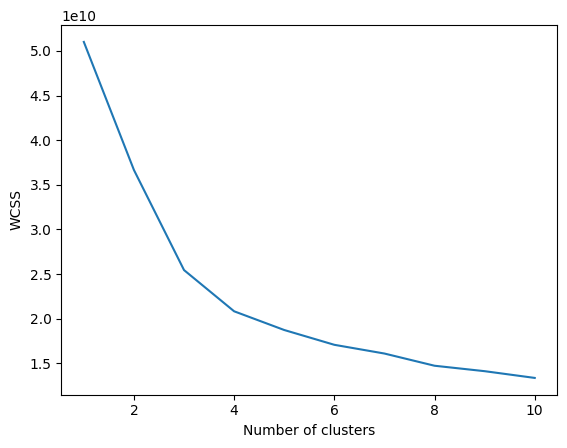

In [ ]:
from sklearn.cluster import KMeans

X = n_ds.loc[:, 'II_mean_nni':'V6_triangular_index']
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)  
      
plt.plot(range(1, 11), wcss) 
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
duplicated_df

In [ ]:
acc = []

dis = []
k = list(range(1,211))
def k2acc(df, K):

    data = df.loc[:, 'II_mean_nni':'V6_triangular_index']
    for k in K:
        
        data = df.loc[:, 'II_mean_nni':'V6_triangular_index']
        scaler = StandardScaler()

        data_scaled = scaler.fit_transform(data)
        pca = PCA(n_components = k)
        pC = pca.fit_transform(data_scaled)
        principalDf = pd.DataFrame(data = pC
             , columns = list(range(1,k+1)))
        data_scaled = principalDf

        pd.DataFrame(data_scaled).describe()
        kmeans = KMeans(n_clusters = 3, init='k-means++', n_init='auto', random_state = 42)
        kmeans.fit(data_scaled)
        pred = kmeans.predict(data_scaled)

        dis.append(silhouette_score(data_scaled, pred))
        acc.append(accuracy_score(df['target'].astype(int), pred))

k2acc(n_ds, k)

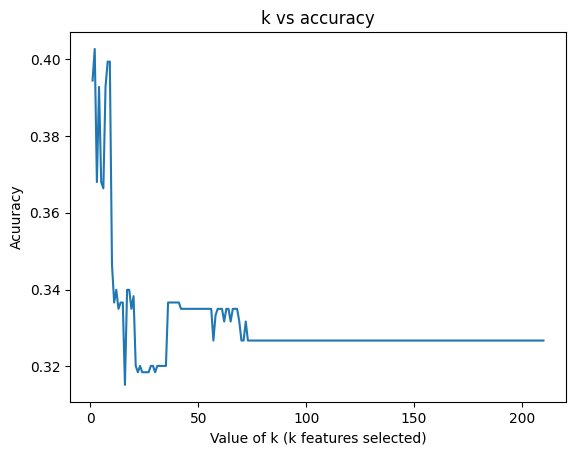

In [ ]:
plt.plot(k, acc)

# Setting up labels and title
plt.xlabel('Value of k (k features selected)')
plt.ylabel('Acuuracy')
plt.title('k vs accuracy')

# Displaying the plot
plt.show()

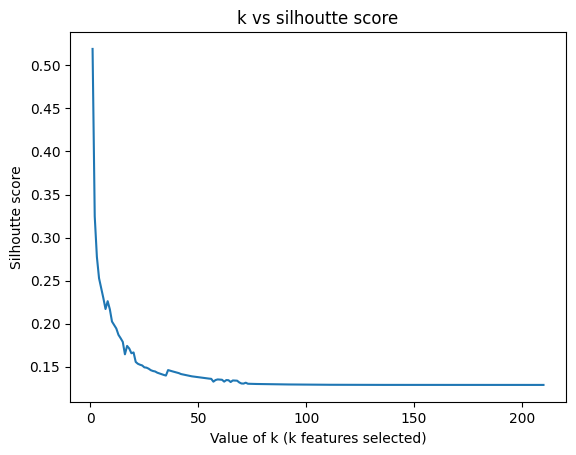

In [ ]:
plt.plot(k, dis)

# Setting up labels and title
plt.xlabel('Value of k (k features selected)')
plt.ylabel('Silhoutte score')
plt.title('k vs silhoutte score')

# Displaying the plot
plt.show()

In [ ]:
## k = 7 is best
print(dis)
index = dis.index(max(dis))

index+1

[0.5191147677595354, 0.3246671706248882, 0.27750449648817327, 0.2527221352227056, 0.24119704088713018, 0.22968435254701097, 0.21698287176092243, 0.22609568135134075, 0.21672425514136195, 0.2024540243722128, 0.19840490711168063, 0.19436979454362244, 0.1870228901944649, 0.1831094269966233, 0.17881423711003774, 0.16438634159447874, 0.17413365790896618, 0.17113330729974505, 0.16563778703714616, 0.16656789799902258, 0.1555522785845476, 0.15339045753948313, 0.15228085357680304, 0.15146492319439758, 0.14924187257869295, 0.14889323482355094, 0.14767443635560676, 0.145943637536797, 0.1449947682316126, 0.14445862249597213, 0.14303541501771966, 0.1421384035598566, 0.14125493500984873, 0.14045111172504027, 0.13971229821265385, 0.1460769408515619, 0.1452920398642725, 0.14459528158930757, 0.1438720230268908, 0.14318072248910282, 0.14252516001949062, 0.14144775856986028, 0.14091438746042598, 0.14032192687266554, 0.13978474574792574, 0.13929239408658817, 0.13881777083755445, 0.13847856515934162, 0.138

1

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
data = n_ds.loc[:, 'II_mean_nni':'V6_triangular_index']
# X_new = SelectKBest(chi2, k=index+1).fit_transform(data, n_ds['v'])
# X_new.shape

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# data= X_new
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
count,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,...,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02
mean,-4.572800e-16,3.283036e-16,2.462277e-16,-1.377702e-16,5.276307e-17,-3.019220e-16,-1.407015e-16,5.862564e-18,-2.931282e-17,-5.276307e-17,...,9.380102e-17,-6.155692e-17,-2.931282e-17,-5.862564e-18,-5.510810e-16,7.650646e-16,7.650646e-16,-3.576164e-16,-8.207589e-17,-2.345026e-17
std,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,...,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00
min,-1.824923e+00,-1.951382e+00,-2.509790e+00,-2.366296e+00,-2.202228e+00,-3.961455e+00,-3.935182e+00,-2.477715e+00,-1.695473e+00,-2.003263e+00,...,-1.835780e+00,-5.518201e-01,-7.637417e-01,-2.252355e+00,-1.805877e+00,-2.146008e+00,-2.146008e+00,-4.503954e+00,-1.305851e+00,-1.882697e+00
25%,-6.861585e-01,-7.553906e-01,-6.518088e-01,-5.517115e-01,-7.111958e-01,-5.347641e-01,-4.219111e-01,-6.785446e-01,-6.858071e-01,-8.148587e-01,...,-8.224096e-01,-3.648344e-01,-6.755496e-01,-6.888539e-01,-7.956161e-01,-7.786891e-01,-7.786891e-01,-6.057467e-01,-8.244192e-01,-6.298455e-01
50%,-5.854969e-02,-1.273012e-01,-9.456189e-02,-9.806540e-02,3.432017e-02,-4.523685e-02,1.636340e-01,-1.098285e-01,-9.082558e-02,-8.526898e-02,...,-6.394874e-02,-1.801410e-01,-3.524689e-01,-8.594517e-02,-1.501635e-01,-5.086339e-02,-5.086339e-02,1.080382e-01,-2.702881e-01,-3.527214e-02
75%,6.374852e-01,7.315297e-01,6.658152e-01,8.092267e-01,6.442878e-01,4.442905e-01,7.491791e-01,6.530159e-01,5.897972e-01,7.496223e-01,...,8.380573e-01,1.334834e-01,3.019921e-01,5.167103e-01,6.668883e-01,7.145450e-01,7.145450e-01,7.188765e-01,6.991925e-01,2.195450e-01
max,4.290826e+00,2.740240e+00,4.722818e+00,2.623811e+00,2.270868e+00,1.912872e+00,1.334724e+00,4.450917e+00,3.893748e+00,3.036172e+00,...,1.948946e+00,2.067312e+01,9.881877e+00,8.593505e+00,5.017105e+00,3.546921e+00,3.546921e+00,3.176189e+00,4.058241e+00,3.786985e+00


In [ ]:
pca = PCA(n_components = 1)
pC = pca.fit_transform(data_scaled)
tm=[]
for i in range(1, index+2):
    tm.append(str(i))
principalDf = pd.DataFrame(data = pC, columns = ['feature'])
data_scaled = principalDf


In [ ]:
# k means using 2 clusters and k-means++ initialization
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
print(data_scaled)
print(pred)

       feature
0     8.218444
1    -9.639311
2    12.456891
3     0.736971
4     0.617112
..         ...
601   6.017171
602   0.643925
603 -18.148493
604 -15.633765
605 -16.866955

[606 rows x 1 columns]
[2 1 2 0 0 0 0 2 2 1 0 0 1 0 0 2 2 0 2 0 0 1 1 1 2 1 1 2 0 1 0 0 0 1 1 0 2
 0 1 0 2 1 0 0 1 0 0 1 1 0 1 0 1 2 1 1 0 2 0 1 0 0 1 0 2 2 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 2 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1
 0 1 1 2 0 0 1 0 0 2 2 2 2 2 1 0 1 1 0 1 0 0 0 0 1 1 1 0 2 0 2 1 1 1 0 1 1
 2 2 1 1 1 1 2 0 2 2 2 0 0 0 2 1 1 1 0 0 1 0 0 1 2 0 1 1 1 0 2 2 1 2 0 1 1
 1 1 2 2 1 0 2 0 0 0 1 0 1 1 1 1 2 0 1 0 0 1 0 0 0 2 0 2 0 1 0 2 1 0 2 0 2
 1 1 1 1 1 0 0 2 0 2 2 2 0 2 2 0 1 2 0 0 0 2 2 0 0 0 0 0 1 0 2 2 1 0 1 2 0
 1 1 1 1 0 1 0 1 0 2 0 0 0 1 0 0 1 1 1 0 0 0 2 0 0 1 2 0 0 1 0 2 2 0 2 1 2
 2 0 0 2 1 0 2 1 2 2 0 2 2 2 0 2 2 2 2 0 1 2 0 0 0 1 1 1 0 0 1 2 0 2 1 0 0
 0 0 2 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 2 2 2 1 1 0 2 1 1 0 2 2 0 0 2 1 2
 0 2 0 2 2 0 0 1 0 0 2 0 0 1 0 2 1 1 0 1 1 0 0

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


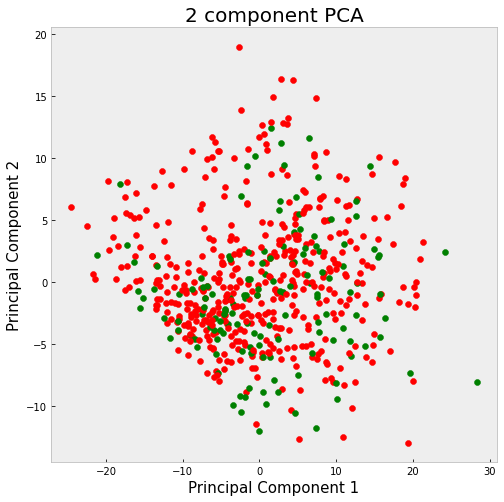

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g']
# for target, color in zip(pred,colors):
for i in data_scaled.index:
    ax.scatter(data_scaled.loc[i, 'pc1']
                , data_scaled.loc[i, 'pc2']
                , c = colors[data_scaled.loc[i,'target']]
                )
ax.grid()

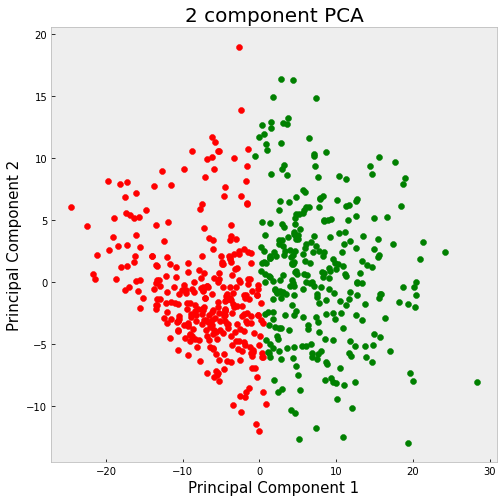

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g']
# for target, color in zip(pred,colors):
for i in data_scaled.index:
    ax.scatter(data_scaled.loc[i, 'pc1']
                , data_scaled.loc[i, 'pc2']
                , c = colors[data_scaled.loc[i,'cluster']]
                )
ax.grid()

In [ ]:
# inertia on the fitted data
kmeans.inertia_

32898.47356523088

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['target'] = n_ds['target'].astype(int)
frame['cluster'].value_counts()
'''
0    464
1    142
Name: target

1    230
0    226
2    150
Name: cluster

'''

0    265
1    187
2    154
Name: cluster, dtype: int64

In [ ]:
frame['target'].value_counts()

0    464
1    142
Name: target, dtype: int64

In [ ]:
frame

,pc1,pc2,cluster,target
0,8.218444,6.935282,1,0
1,-9.639311,-0.617508,0,0
2,12.456891,-5.146323,1,0
3,0.736971,3.753339,1,0
4,0.617112,2.489279,1,1
...,...,...,...,...
601,6.017171,6.084900,1,0
602,0.643925,11.917895,1,0
603,-18.148493,7.904049,0,1
604,-15.633765,2.833107,0,0


In [ ]:
from sklearn.metrics import accuracy_score, silhouette_score
print('Accuracy:', accuracy_score(frame['target'], frame['cluster']))
print('Silhoutte score:', silhouette_score(data_scaled, frame['cluster']))

Accuracy: 0.3795379537953795
Silhoutte score: 0.5267852195898127


In [ ]:
from sklearn.metrics import pairwise_distances
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# compute pairwise distances between centroids
distances = pairwise_distances(centroids)
distances

array([[ 0.        , 10.85517425, 11.08090804],
       [10.85517425,  0.        , 21.93608229],
       [11.08090804, 21.93608229,  0.        ]])

In [ ]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot


# define the model
model = SpectralClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(data_scaled)
# retrieve unique clusters
print(yhat)
clusters = unique(yhat)
print('Clusters', clusters)
print(pd.DataFrame(yhat).value_counts())

[1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0
 0 2 2 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 0 0 2
 1 1 0 0 0 2 1 0 1 1 1 0 0 0 1 0 2 2 0 0 0 0 0 0 1 0 0 2 0 0 1 1 2 1 0 0 0
 0 2 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 2 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 0 1 1 0 1 2 1
 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 2 2 0 0 2 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 2 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 0 

In [ ]:
from sklearn.metrics import accuracy_score, silhouette_score
print('Accuracy:', accuracy_score(yhat, data_scaled['v']))
print('Silhoutte score:', silhouette_score(data_scaled['v'], yhat))

KeyError: ignored

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
model = GaussianMixture(n_components=2)
# fit the model
model.fit(data_scaled)
# assign a cluster to each example
yhat = model.predict(data_scaled)
print(yhat)
clusters = unique(yhat)
print('Clusters', clusters)
print(pd.DataFrame(yhat).value_counts())

[0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1
 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1
 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 

In [ ]:
from sklearn.metrics import accuracy_score, silhouette_score
print('Accuracy:', accuracy_score(yhat, frame['target']))
print('Silhoutte score:', silhouette_score(frame['target'], yhat))

Accuracy: 0.48184818481848185
Silhoutte score: 0.4325476816327307


In [ ]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot

model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(data_scaled)
# retrieve unique clusters
yhat += 1
clusters = unique(yhat)
print('Clusters', clusters)
print(pd.DataFrame(yhat).value_counts())

Clusters [0 1 2 3 4]
0    558
3     14
1     12
2     11
4     11
dtype: int64


In [ ]:
# from sklearn.metrics import accuracy_score, silhouette_score
# print('Accuracy:', accuracy_score(yhat, frame['target']))
# print('Silhoutte score:', silhouette_score(data_scaled, yhat))

SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(data_scaled, n_ds['v'])

SVC()

In [ ]:
svm_pred = clf.predict(data_scaled)

In [ ]:
svm_pred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(frame['cluster'], svm_pred))

Accuracy: 0.49504950495049505



# Classifiers
